<a href="https://colab.research.google.com/github/ssthkr253/EDA_agg_NYC_TAXI-Suraj_Singh-.ipynb/blob/main/EDA_Assg_NYC_Taxi_Starter(Suraj_Singh).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")




In [ ]:
# Import the libraries you will be using for analysis



In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)


numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('/content/2023-1.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/NYC_Taxi_EDA_Assignment')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        month_df = pd.read_parquet(file_path)

        # Extract date and hour
        month_df['date'] = month_df['tpep_pickup_datetime'].dt.date
        month_df['hour'] = month_df['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data_month = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in month_df['date'].unique():
            date_df = month_df[month_df['date'] == date]
            for hour in range(24):
                hour_df = date_df[date_df['hour'] == hour]
                # Sample 5% of the hourly data randomly
                if not hour_df.empty:
                    sample = hour_df.sample(frac = 0.05, random_state = 42)
                    # add data of this hour to the dataframe
                    sampled_data_month = pd.concat([sampled_data_month, sample])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data_month])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_parquet('final_sampled_df.shape')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df.to_parquet



<bound method DataFrame.to_parquet of          VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
2706519         2  2023-09-01 00:39:59   2023-09-01 01:00:28              NaN   
1059            2  2023-09-01 00:24:50   2023-09-01 00:27:19              2.0   
2273            2  2023-09-01 00:19:27   2023-09-01 01:04:02              2.0   
1152            2  2023-09-01 00:42:13   2023-09-01 01:20:20              2.0   
1997            2  2023-09-01 00:11:38   2023-09-01 00:17:56              1.0   
...           ...                  ...                   ...              ...   
3339233         1  2023-11-30 23:01:23   2023-11-30 23:14:15              NaN   
3202758         2  2023-11-30 23:21:56   2023-11-30 23:36:27              1.0   
3204928         1  2023-11-30 23:59:24   2023-12-01 00:05:48              1.0   
3206312         2  2023-11-30 23:25:14   2023-11-30 23:56:49              1.0   
3203330         2  2023-11-30 23:57:51   2023-12-01 00:03:42              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
2706519           4.71         NaN               None           113   
1059              0.56         1.0                  N           142   
2273             18.46         2.0                  N           132   
1152             13.71         1.0                  N           249   
1997              0.71         1.0                  N           144   
...                ...         ...                ...           ...   
3339233           0.00         NaN               None           163   
3202758           8.59         1.0                  N           138   
3204928           1.50         1.0                  N           107   
3206312           7.47         1.0                  N           148   
3203330           2.52         1.0                  N            75   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
2706519           238             0  ...      0.5        4.32          0.00   
1059              142             2  ...      0.5        0.00          0.00   
2273              163             1  ...      0.5       15.71          6.94   
1152              180             4  ...      0.5        0.00          0.00   
1997              232             1  ...      0.5        2.00          0.00   
...               ...           ...  ...      ...         ...           ...   
3339233           238             0  ...      0.5        0.00          0.00   
3202758           262             1  ...      0.5       10.15          6.94   
3204928           186             1  ...      0.5        3.80          0.00   
3206312           202             1  ...      0.5        0.00          6.94   
3203330           141             1  ...      0.5        3.28          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
2706519                    1.0         33.15                   NaN   
1059                       1.0         10.10                   2.5   
2273                       1.0         98.40                   2.5   
1152                       1.0         64.70                   2.5   
1997                       1.0         14.90                   2.5   
...                        ...           ...                   ...   
3339233                    1.0         22.73                   NaN   
3202758                    1.0         62.64                   2.5   
3204928                    1.0         16.40                   2.5   
3206312                    1.0         49.24                   2.5   
3203330                    1.0         19.68                   2.5   

         Airport_fee        date  hour airport_fee  
2706519          NaN  2023-09-01     0         NaN  
1059            0.00  2023-09-01     0         NaN  
2273            1.75  2023-09-01     0         NaN  
1152            0.00  2023-09-01     0         NaN  
1997            0.00  2023-09-01     0         NaN  
...              ...        

In [ ]:
 df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,date,hour,airport_fee
2706519,2,2023-09-01 00:39:59,2023-09-01 01:00:28,NaN,4.71,NaN,None,113,238,0,...,0.5,4.32,0.00,1.0,33.15,NaN,NaN,2023-09-01,0,NaN
1059,2,2023-09-01 00:24:50,2023-09-01 00:27:19,2.0,0.56,1.0,N,142,142,2,...,0.5,0.00,0.00,1.0,10.10,2.5,0.00,2023-09-01,0,NaN
2273,2,2023-09-01 00:19:27,2023-09-01 01:04:02,2.0,18.46,2.0,N,132,163,1,...,0.5,15.71,6.94,1.0,98.40,2.5,1.75,2023-09-01,0,NaN
1152,2,2023-09-01 00:42:13,2023-09-01 01:20:20,2.0,13.71,1.0,N,249,180,4,...,0.5,0.00,0.00,1.0,64.70,2.5,0.00,2023-09-01,0,NaN
1997,2,2023-09-01 00:11:38,2023-09-01 00:17:56,1.0,0.71,1.0,N,144,232,1,...,0.5,2.00,0.00,1.0,14.90,2.5,0.00,2023-09-01,0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1896400 entries, 2706519 to 3203330
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee          

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
df = df.drop(columns=['date', 'hour'])

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
# Check if both columns exist before attempting to combine
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['airport_fee_combined'] = df['Airport_fee'].fillna(df['airport_fee'])
    df = df.drop(columns=['Airport_fee', 'airport_fee'])
elif 'Airport_fee' in df.columns:
    df['airport_fee_combined'] = df['Airport_fee']
    df = df.drop(columns=['Airport_fee'])
elif 'airport_fee' in df.columns:
    df['airport_fee_combined'] = df['airport_fee']
    df = df.drop(columns=['airport_fee'])
else:
    print("Neither 'Airport_fee' nor 'airport_fee' columns found. Creating a combined column filled with 0.")
    df['airport_fee_combined'] = 0

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
display(df[df['fare_amount'] < 0])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts



In [ ]:
# Find which columns have negative values
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']
for col in monetary_cols:
    if (col in df.columns) and (df[col] < 0).any():
        print(f"Column '{col}' has negative values.")
        display(df[df[col] < 0])

Column 'extra' has negative values.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
636725,2,2023-10-06 22:24:42,2023-10-06 22:25:38,2.0,0.03,1.0,N,161,161,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0
2880204,2,2023-10-27 14:51:03,2023-10-27 14:51:11,1.0,0.00,1.0,N,265,265,2,3.0,-2.5,0.0,0.0,0.0,1.0,4.0,0.0,0.0
678398,2,2023-11-06 22:37:04,2023-11-06 22:37:55,1.0,0.03,1.0,N,229,229,2,0.0,-1.0,-0.5,0.0,0.0,-1.0,-5.0,-2.5,0.0


Column 'mta_tax' has negative values.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
139296,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3.0,0.00,2.0,N,74,74,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,0.00
361359,2,2023-09-05 15:32:01,2023-09-05 15:43:35,1.0,0.01,1.0,N,161,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
116491,2,2023-02-02 08:12:32,2023-02-02 08:24:59,1.0,2.12,1.0,N,236,161,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1335197,2,2023-02-14 09:49:00,2023-02-14 10:01:58,1.0,2.48,1.0,N,236,263,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,0.00
1446170,2,2023-02-15 10:55:02,2023-02-15 11:56:22,1.0,12.34,1.0,N,138,230,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325115,2,2023-11-12 14:34:25,2023-11-12 15:08:43,2.0,1.97,1.0,N,162,249,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2020250,2,2023-11-18 16:32:18,2023-11-18 16:32:48,1.0,0.02,1.0,N,164,164,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2286807,2,2023-11-21 09:55:48,2023-11-21 10:22:57,1.0,0.65,1.0,N,43,186,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2420372,2,2023-11-22 15:44:42,2023-11-22 15:45:57,1.0,0.05,2.0,N,132,132,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75


Column 'improvement_surcharge' has negative values.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
139296,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3.0,0.00,2.0,N,74,74,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,0.00
361359,2,2023-09-05 15:32:01,2023-09-05 15:43:35,1.0,0.01,1.0,N,161,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2656771,2,2023-09-30 16:35:07,2023-09-30 16:35:13,1.0,0.00,5.0,N,141,141,2,0.0,0.0,0.0,0.0,0.0,-1.0,-3.50,-2.5,0.00
116491,2,2023-02-02 08:12:32,2023-02-02 08:24:59,1.0,2.12,1.0,N,236,161,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1335197,2,2023-02-14 09:49:00,2023-02-14 10:01:58,1.0,2.48,1.0,N,236,263,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325115,2,2023-11-12 14:34:25,2023-11-12 15:08:43,2.0,1.97,1.0,N,162,249,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2020250,2,2023-11-18 16:32:18,2023-11-18 16:32:48,1.0,0.02,1.0,N,164,164,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2286807,2,2023-11-21 09:55:48,2023-11-21 10:22:57,1.0,0.65,1.0,N,43,186,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2420372,2,2023-11-22 15:44:42,2023-11-22 15:45:57,1.0,0.05,2.0,N,132,132,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75


Column 'total_amount' has negative values.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
139296,2,2023-09-02 18:29:48,2023-09-02 18:30:13,3.0,0.00,2.0,N,74,74,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,0.00
361359,2,2023-09-05 15:32:01,2023-09-05 15:43:35,1.0,0.01,1.0,N,161,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2656771,2,2023-09-30 16:35:07,2023-09-30 16:35:13,1.0,0.00,5.0,N,141,141,2,0.0,0.0,0.0,0.0,0.0,-1.0,-3.50,-2.5,0.00
116491,2,2023-02-02 08:12:32,2023-02-02 08:24:59,1.0,2.12,1.0,N,236,161,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1335197,2,2023-02-14 09:49:00,2023-02-14 10:01:58,1.0,2.48,1.0,N,236,263,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-1.50,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325115,2,2023-11-12 14:34:25,2023-11-12 15:08:43,2.0,1.97,1.0,N,162,249,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2020250,2,2023-11-18 16:32:18,2023-11-18 16:32:48,1.0,0.02,1.0,N,164,164,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2286807,2,2023-11-21 09:55:48,2023-11-21 10:22:57,1.0,0.65,1.0,N,43,186,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2420372,2,2023-11-22 15:44:42,2023-11-22 15:45:57,1.0,0.05,2.0,N,132,132,4,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75


Column 'congestion_surcharge' has negative values.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
361359,2,2023-09-05 15:32:01,2023-09-05 15:43:35,1.0,0.01,1.0,N,161,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2656771,2,2023-09-30 16:35:07,2023-09-30 16:35:13,1.0,0.00,5.0,N,141,141,2,0.0,0.0,0.0,0.0,0.0,-1.0,-3.50,-2.5,0.00
116491,2,2023-02-02 08:12:32,2023-02-02 08:24:59,1.0,2.12,1.0,N,236,161,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1446170,2,2023-02-15 10:55:02,2023-02-15 11:56:22,1.0,12.34,1.0,N,138,230,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
365043,2,2023-04-04 16:24:21,2023-04-04 16:24:28,4.0,0.00,1.0,N,264,264,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
1188553,2,2023-04-12 19:12:27,2023-04-12 19:37:09,1.0,3.61,1.0,N,68,232,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2465789,2,2023-04-24 12:48:38,2023-04-24 12:48:44,1.0,0.00,5.0,N,140,7,2,0.0,0.0,0.0,0.0,0.0,-1.0,-3.50,-2.5,0.00
1045799,2,2023-03-10 16:18:09,2023-03-10 16:49:43,3.0,6.94,1.0,N,88,230,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-4.00,-2.5,0.00
2098034,2,2023-03-20 12:10:40,2023-03-20 13:03:14,1.0,16.11,2.0,N,132,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
179607,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25


Column 'airport_fee_combined' has negative values.


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
1446170,2,2023-02-15 10:55:02,2023-02-15 11:56:22,1.0,12.34,1.0,N,138,230,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
980781,2,2023-04-10 18:40:15,2023-04-10 18:44:09,1.0,0.36,1.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
1328318,2,2023-03-13 11:40:22,2023-03-13 11:51:53,1.0,3.49,1.0,N,138,253,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-2.75,0.0,-1.25
2098034,2,2023-03-20 12:10:40,2023-03-20 13:03:14,1.0,16.11,2.0,N,132,170,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
179607,2,2023-01-03 14:24:45,2023-01-03 14:25:14,1.0,0.00,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.25,-2.5,-1.25
951387,2,2023-05-09 17:05:56,2023-05-09 17:24:59,1.0,8.35,1.0,N,132,222,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
3348656,2,2023-05-31 14:52:23,2023-05-31 15:54:56,2.0,17.37,2.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.75,-2.5,-1.75
1694220,2,2023-10-17 00:56:18,2023-10-17 00:56:35,1.0,0.06,1.0,N,132,132,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
1703670,2,2023-10-17 08:39:40,2023-10-17 08:41:19,1.0,0.29,1.0,N,138,70,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-3.25,0.0,-1.75
2227565,2,2023-06-21 16:01:44,2023-06-21 17:11:47,1.0,12.56,2.0,N,132,114,2,0.0,0.0,-0.5,0.0,0.0,-1.0,-5.75,-2.5,-1.75


In [ ]:
# fix these negative values
monetary_cols = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']
for col in monetary_cols:
    if (col in df.columns) and (df[col] < 0).any():
        df = df[df[col] >= 0]

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum()
missing_proportion = missing_values / len(df)
display(missing_proportion)

,0
VendorID,0.00000
tpep_pickup_datetime,0.00000
tpep_dropoff_datetime,0.00000
passenger_count,0.03421
trip_distance,0.00000
RatecodeID,0.03421
store_and_fwd_flag,0.03421
PULocationID,0.00000
DOLocationID,0.00000
payment_type,0.00000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values in 'passenger_count'
display(df[df['passenger_count'].isnull()])

# Impute NaN values in 'passenger_count' with the mode
mode_passenger_count = df['passenger_count'].mode()[0]
df['passenger_count'] = df['passenger_count'].fillna(mode_passenger_count)

# Display rows with zero passenger count
display(df[df['passenger_count'] == 0])

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
2706519,2,2023-09-01 00:39:59,2023-09-01 01:00:28,NaN,4.71,NaN,None,113,238,0,24.83,0.0,0.5,4.32,0.0,1.0,33.15,NaN,NaN
2706533,2,2023-09-01 00:01:15,2023-09-01 00:07:07,NaN,1.07,NaN,None,148,4,0,11.88,0.0,0.5,2.00,0.0,1.0,17.88,NaN,NaN
2706583,2,2023-09-01 01:58:13,2023-09-01 02:12:29,NaN,3.32,NaN,None,211,230,0,19.04,0.0,0.5,4.61,0.0,1.0,27.65,NaN,NaN
2706577,2,2023-09-01 01:08:34,2023-09-01 01:20:38,NaN,2.67,NaN,None,144,65,0,19.89,0.0,0.5,4.30,0.0,1.0,28.19,NaN,NaN
2706592,1,2023-09-01 02:29:04,2023-09-01 02:45:34,NaN,0.00,NaN,None,79,48,0,19.85,0.0,0.5,0.00,0.0,1.0,23.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339597,2,2023-11-30 23:38:07,2023-11-30 23:50:50,NaN,1.35,NaN,None,161,164,0,14.62,0.0,0.5,0.00,0.0,1.0,18.62,NaN,NaN
3339092,1,2023-11-30 23:49:26,2023-11-30 23:56:00,NaN,0.00,NaN,None,114,148,0,18.20,0.0,0.5,0.00,0.0,1.0,22.20,NaN,NaN
3338759,2,2023-11-30 23:44:13,2023-11-30 23:52:02,NaN,1.01,NaN,None,161,141,0,11.33,0.0,0.5,0.00,0.0,1.0,15.33,NaN,NaN
3338686,2,2023-11-30 23:17:41,2023-11-30 23:32:07,NaN,3.64,NaN,None,80,45,0,25.09,0.0,0.5,0.00,0.0,1.0,29.09,NaN,NaN


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
3693,1,2023-09-01 01:27:10,2023-09-01 01:40:32,0.0,3.1,1.0,N,231,234,1,15.6,3.50,0.5,1.00,0.00,1.0,21.60,2.5,0.00
6244,1,2023-09-01 05:49:22,2023-09-01 06:04:20,0.0,6.7,1.0,N,132,76,2,27.5,2.75,0.5,0.00,0.00,1.0,31.75,0.0,1.75
6803,1,2023-09-01 06:28:39,2023-09-01 07:07:18,0.0,17.6,2.0,N,132,186,1,70.0,4.25,0.5,20.65,6.94,1.0,103.34,2.5,1.75
7335,1,2023-09-01 06:52:59,2023-09-01 07:10:33,0.0,11.6,1.0,N,132,154,2,43.6,0.00,0.5,0.00,0.00,1.0,45.10,0.0,0.00
8575,1,2023-09-01 07:30:13,2023-09-01 08:16:46,0.0,16.9,2.0,N,132,68,2,70.0,4.25,0.5,0.00,6.94,1.0,82.69,2.5,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188434,1,2023-11-30 21:06:45,2023-11-30 21:15:12,0.0,1.5,1.0,N,237,236,1,10.0,3.50,0.5,3.00,0.00,1.0,18.00,2.5,0.00
3200349,1,2023-11-30 22:32:50,2023-11-30 22:49:11,0.0,1.3,1.0,N,237,164,2,14.9,2.50,0.5,0.00,0.00,1.0,18.90,2.5,0.00
3197479,1,2023-11-30 22:42:09,2023-11-30 22:52:52,0.0,1.9,1.0,N,162,263,1,12.8,3.50,0.5,3.56,0.00,1.0,21.36,2.5,0.00
3203935,1,2023-11-30 23:11:52,2023-11-30 23:13:44,0.0,0.4,1.0,N,234,170,1,4.4,3.50,0.5,1.00,0.00,1.0,10.40,2.5,0.00


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
mode_ratecode_id = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(mode_ratecode_id)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('N')
# airport_fee_combined column is handled in a previous step, so this line is not needed here.
# df['airport_fee_combined'] = df['airport_fee_combined'].fillna(0)

print("Remaining missing values have been handled.")
display(df.isnull().sum())

Remaining missing values have been handled.


,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
display(df.describe())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
count,1.896321e+06,1896321,1896321,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.896321e+06,1.831447e+06
mean,1.733015e+00,2023-07-02 19:59:00.671689,2023-07-02 20:16:26.662165,1.356579e+00,3.858258e+00,1.612985e+00,1.652818e+02,1.640515e+02,1.163780e+00,1.992018e+01,1.588086e+00,4.953195e-01,3.547158e+00,5.965587e-01,9.990529e-01,2.898322e+01,2.228753e+00,1.429170e-01
min,1.000000e+00,2022-12-31 23:51:30,2022-12-31 23:56:06,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,2023-04-02 16:09:03,2023-04-02 16:27:09,1.000000e+00,1.050000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2023-06-27 15:43:16,2023-06-27 16:00:27,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,5.000000e-01,2.850000e+00,0.000000e+00,1.000000e+00,2.100000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2023-10-06 19:36:18,2023-10-06 19:53:02,1.000000e+00,3.400000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.190000e+01,2.500000e+00,5.000000e-01,4.420000e+00,0.000000e+00,1.000000e+00,3.094000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2023-12-31 23:57:51,2024-01-01 20:50:55,9.000000e+00,1.263605e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.431635e+05,2.080000e+01,4.000000e+00,2.230800e+02,1.430000e+02,1.000000e+00,1.431675e+05,2.500000e+00,1.750000e+00
std,4.476461e-01,NaN,NaN,8.799117e-01,1.294112e+02,7.267410e+00,6.400058e+01,6.980194e+01,5.081096e-01,1.055392e+02,1.829206e+00,4.845241e-02,4.054902e+00,2.187920e+00,2.835794e-02,1.064182e+02,7.775236e-01,4.648540e-01


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print(f"Number of rows after removing passenger_count > 6: {len(df)}")

Number of rows after removing passenger_count > 6: 1896300


In [ ]:
# Continue with outlier handling

# Remove entries where trip_distance is nearly 0 and fare_amount is more than 300
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
print(f"Number of rows after removing outliers with low distance and high fare: {len(df)}")

Number of rows after removing outliers with low distance and high fare: 1896265


In [ ]:
# Do any columns need standardising?



## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

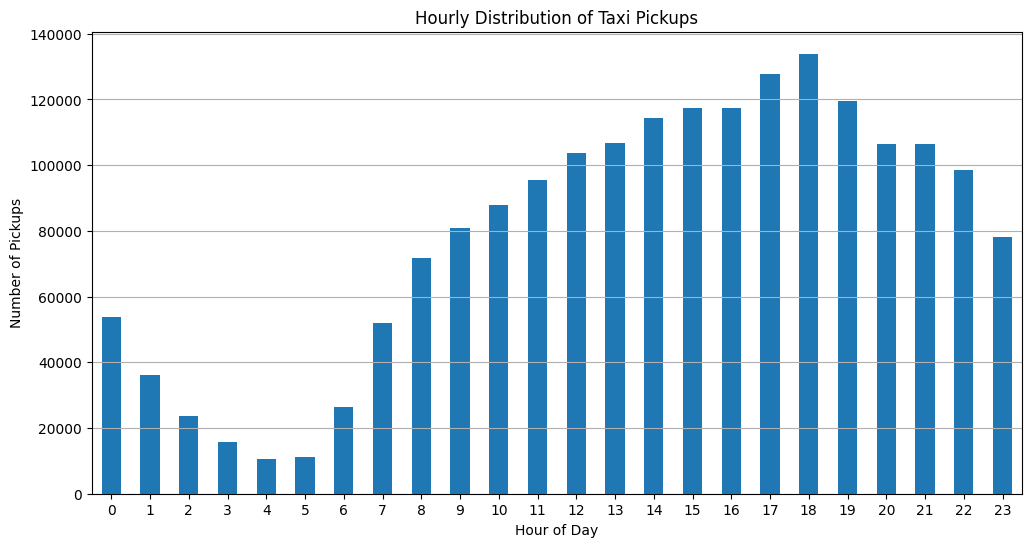

,count
pickup_hour,
0,53675
1,36026
2,23766
3,15674
4,10636
5,11134
6,26325
7,51825
8,71809


In [ ]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
hourly_pickups.plot(kind='bar')
plt.title('Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

display(hourly_pickups)

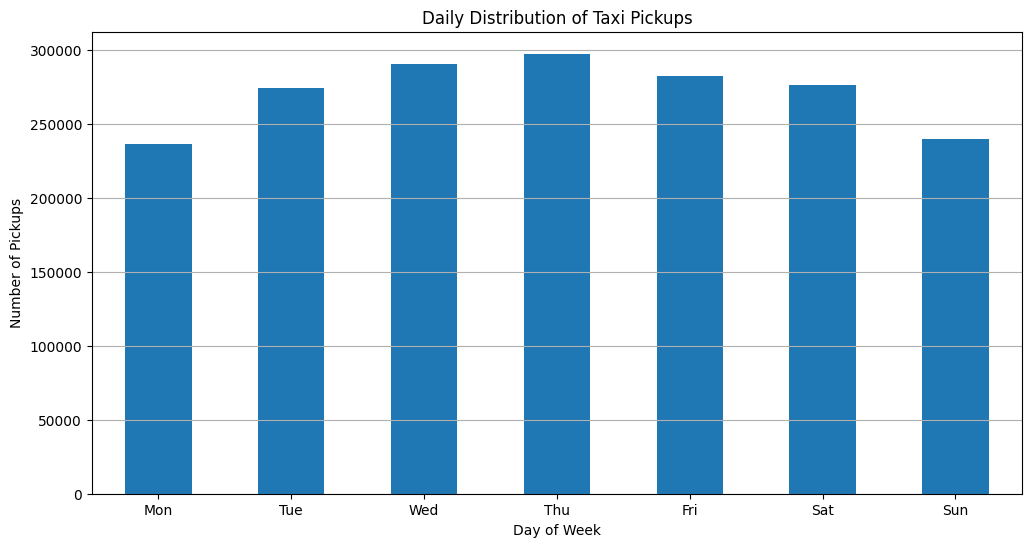

,count
pickup_day_of_week,
0,236300
1,274262
2,290491
3,297288
4,282179
5,276138
6,239607


In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek # Monday=0, Sunday=6
daily_pickups = df['pickup_day_of_week'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
daily_pickups.plot(kind='bar')
plt.title('Daily Distribution of Taxi Pickups')
plt.xlabel('Day of Week')
plt.ylabel('Number of Pickups')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y')
plt.show()

display(daily_pickups)

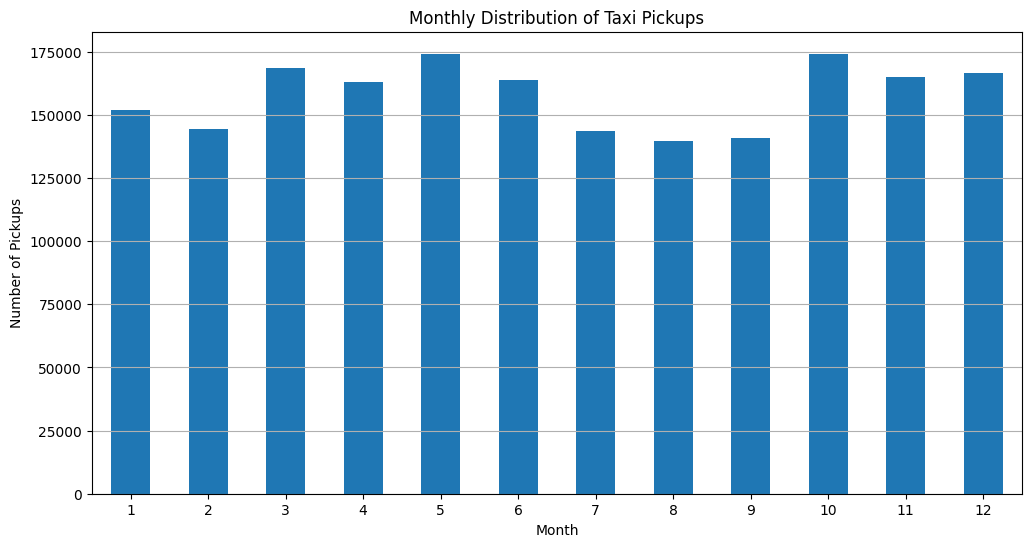

,count
pickup_month,
1,152075
2,144452
3,168690
4,162900
5,174055
6,163769
7,143774
8,139626
9,140870


In [ ]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_pickups.plot(kind='bar')
plt.title('Monthly Distribution of Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

display(monthly_pickups)

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
display(df[financial_cols].describe())

,fare_amount,tip_amount,total_amount,trip_distance
count,1.896265e+06,1.896265e+06,1.896265e+06,1.896265e+06
mean,1.991130e+01,3.546918e+00,2.897416e+01,3.858311e+00
std,1.055210e+02,4.052780e+00,1.063999e+02,1.294131e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.300000e+00,1.000000e+00,1.596000e+01,1.050000e+00
50%,1.350000e+01,2.850000e+00,2.100000e+01,1.800000e+00
75%,2.190000e+01,4.420000e+00,3.094000e+01,3.400000e+00
max,1.431635e+05,2.230800e+02,1.431675e+05,1.263605e+05


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
df_nonzero_financials = df[(df['total_amount'] > 0) & (df['trip_distance'] > 0)].copy()
print(f"Number of rows after removing zero financial values and trip distance: {len(df_nonzero_financials)}")

Number of rows after removing zero financial values and trip distance: 1858516


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue
monthly_revenue = df_nonzero_financials.groupby(df_nonzero_financials['tpep_pickup_datetime'].dt.month)['total_amount'].sum()
display(monthly_revenue)

,total_amount
tpep_pickup_datetime,
1,4091040.18
2,3878613.17
3,4679656.60
4,4603971.11
5,5032950.87
6,4730774.01
7,4099576.09
8,3991454.31
9,4235618.26


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter
df_nonzero_financials['quarter'] = df_nonzero_financials['tpep_pickup_datetime'].dt.quarter
quarterly_revenue = df_nonzero_financials.groupby('quarter')['total_amount'].sum()
total_revenue = quarterly_revenue.sum()
quarterly_revenue_proportion = quarterly_revenue / total_revenue
display(quarterly_revenue_proportion)

,total_amount
quarter,
1,0.235250
2,0.267209
3,0.229250
4,0.268291


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

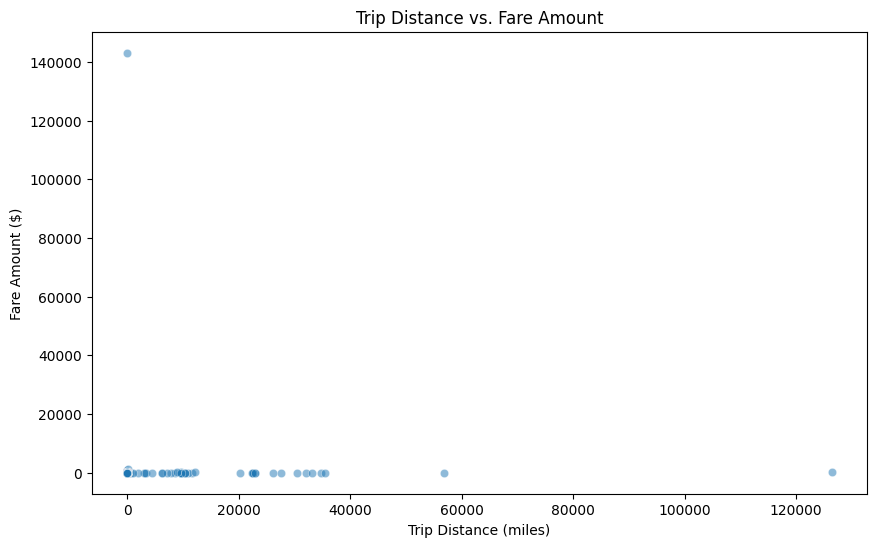

Correlation between trip_distance and fare_amount: 0.01


In [ ]:
# Show how trip fare is affected by distance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero_financials, x='trip_distance', y='fare_amount', alpha=0.5)
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation = df_nonzero_financials['trip_distance'].corr(df_nonzero_financials['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

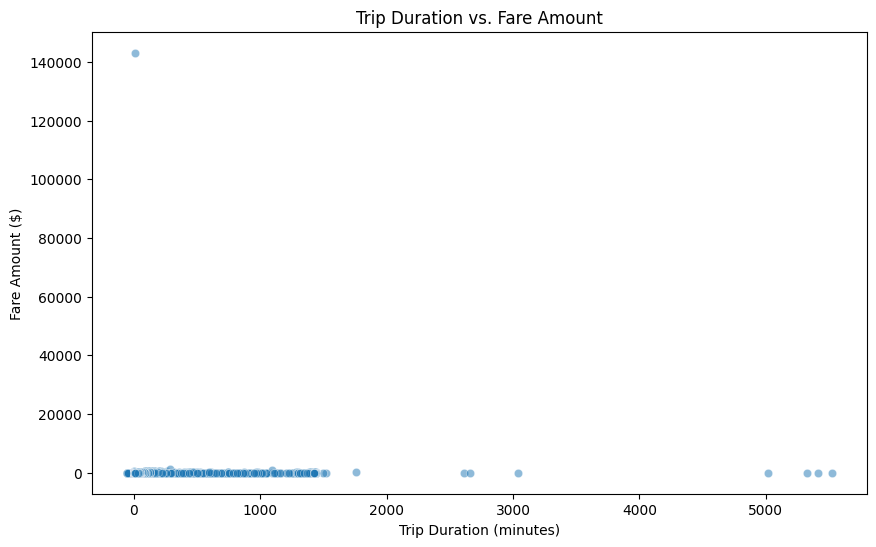

Correlation between trip_duration and fare_amount: 0.05


In [ ]:
# Show relationship between fare and trip duration
df_nonzero_financials['trip_duration'] = (df_nonzero_financials['tpep_dropoff_datetime'] - df_nonzero_financials['tpep_pickup_datetime']).dt.total_seconds() / 60 # duration in minutes

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero_financials, x='trip_duration', y='fare_amount', alpha=0.5)
plt.title('Trip Duration vs. Fare Amount')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation_duration_fare = df_nonzero_financials['trip_duration'].corr(df_nonzero_financials['fare_amount'])
print(f"Correlation between trip_duration and fare_amount: {correlation_duration_fare:.2f}")

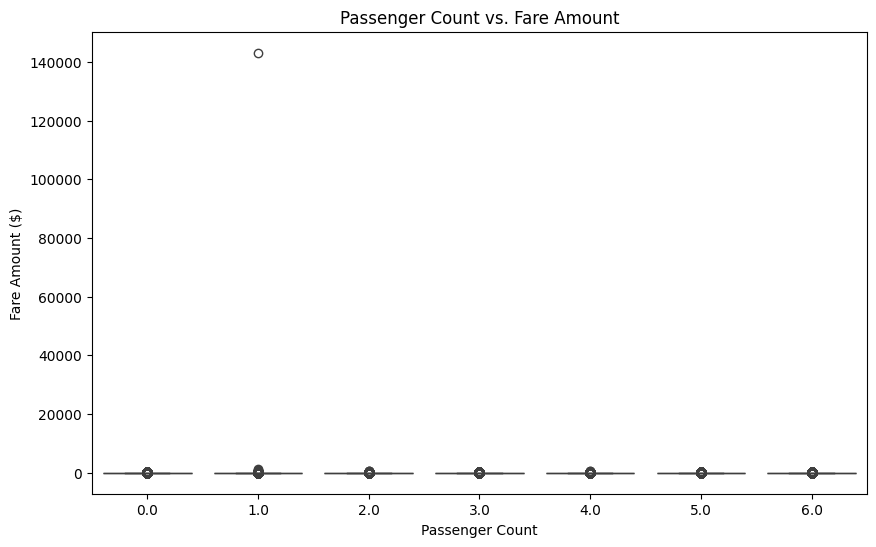

Correlation between passenger_count and fare_amount: 0.01


In [ ]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_nonzero_financials, x='passenger_count', y='fare_amount')
plt.title('Passenger Count vs. Fare Amount')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.show()

correlation_passenger_fare = df_nonzero_financials['passenger_count'].corr(df_nonzero_financials['fare_amount'])
print(f"Correlation between passenger_count and fare_amount: {correlation_passenger_fare:.2f}")

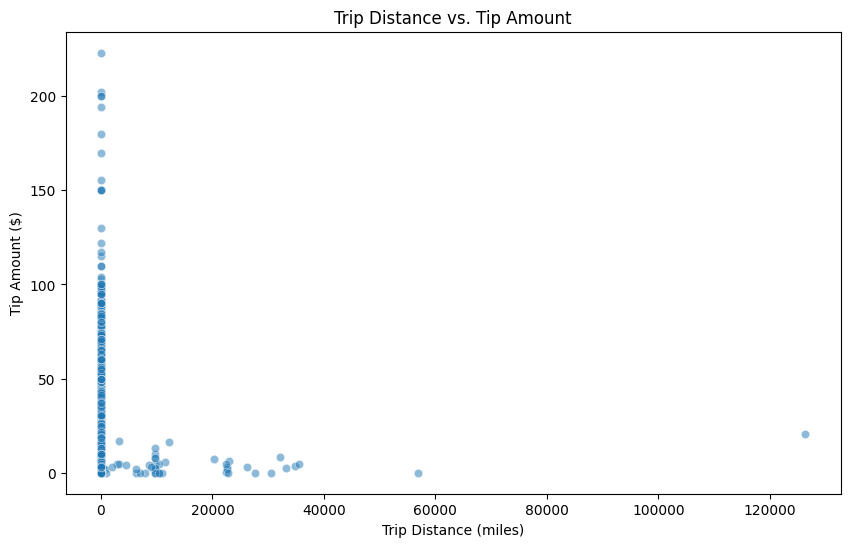

Correlation between trip_distance and tip_amount: 0.02


In [ ]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_nonzero_financials, x='trip_distance', y='tip_amount', alpha=0.5)
plt.title('Trip Distance vs. Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.show()

correlation_distance_tip = df_nonzero_financials['trip_distance'].corr(df_nonzero_financials['tip_amount'])
print(f"Correlation between trip_distance and tip_amount: {correlation_distance_tip:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

,count
payment_type,
1,1479350
2,309911
0,50167
4,12254
3,6834


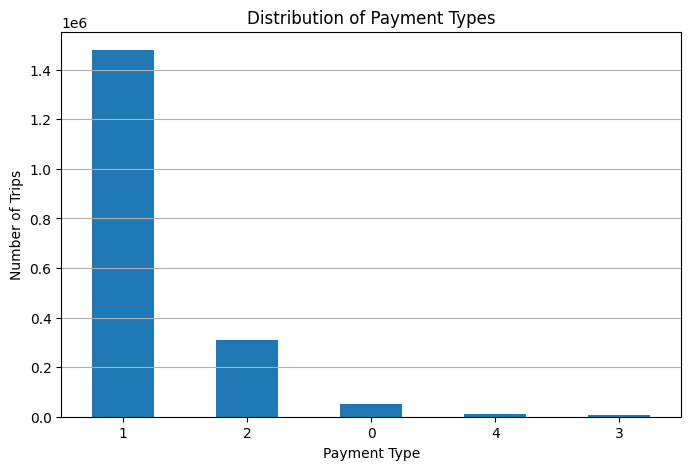

In [ ]:
# Analyse the distribution of different payment types (payment_type).
payment_type_counts = df_nonzero_financials['payment_type'].value_counts()
display(payment_type_counts)

# You can also visualize this
plt.figure(figsize=(8, 5))
payment_type_counts.plot(kind='bar')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/NYC_Taxi_EDA_Assignment/taxi_zones.shp') # read the .shp file using gpd
display(zones.head())

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

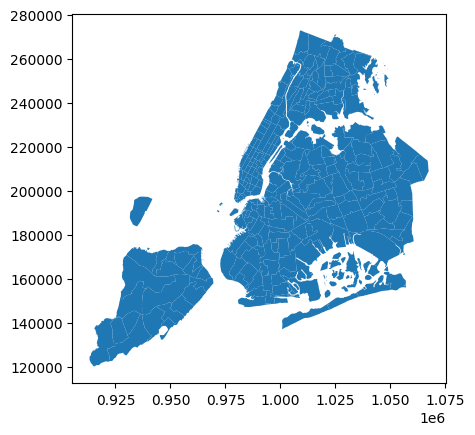

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df_nonzero_financials.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
display(merged_df.head())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,pickup_month,quarter,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-09-01 00:39:59,2023-09-01 01:00:28,1.0,4.71,1.0,N,113,238,0,...,9,3,20.483333,113.0,0.032745,0.000058,Greenwich Village North,113.0,Manhattan,"POLYGON ((986643.64 204346.324, 986592.535 204..."
1,2,2023-09-01 00:24:50,2023-09-01 00:27:19,2.0,0.56,1.0,N,142,142,2,...,9,3,2.483333,142.0,0.038176,0.000076,Lincoln Square East,142.0,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
2,2,2023-09-01 00:19:27,2023-09-01 01:04:02,2.0,18.46,2.0,N,132,163,1,...,9,3,44.583333,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
3,2,2023-09-01 00:42:13,2023-09-01 01:20:20,2.0,13.71,1.0,N,249,180,4,...,9,3,38.116667,249.0,0.036384,0.000072,West Village,249.0,Manhattan,"POLYGON ((983555.319 204876.901, 983469.158 20..."
4,2,2023-09-01 00:11:38,2023-09-01 00:17:56,1.0,0.71,1.0,N,144,232,1,...,9,3,6.300000,144.0,0.027620,0.000047,Little Italy/NoLiTa,144.0,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
location_trip_counts = merged_df['PULocationID'].value_counts().reset_index()
location_trip_counts.columns = ['LocationID', 'trip_count']
display(location_trip_counts.head())

,LocationID,trip_count
0,132,95174
1,237,87917
2,161,86632
3,236,78948
4,162,66095


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(location_trip_counts, on='LocationID', how='left')
# Fill NaN trip counts with 0 for zones with no pickups in the sampled data
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)
display(zones_with_trips.head())

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",49.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",32.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2206.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",9.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

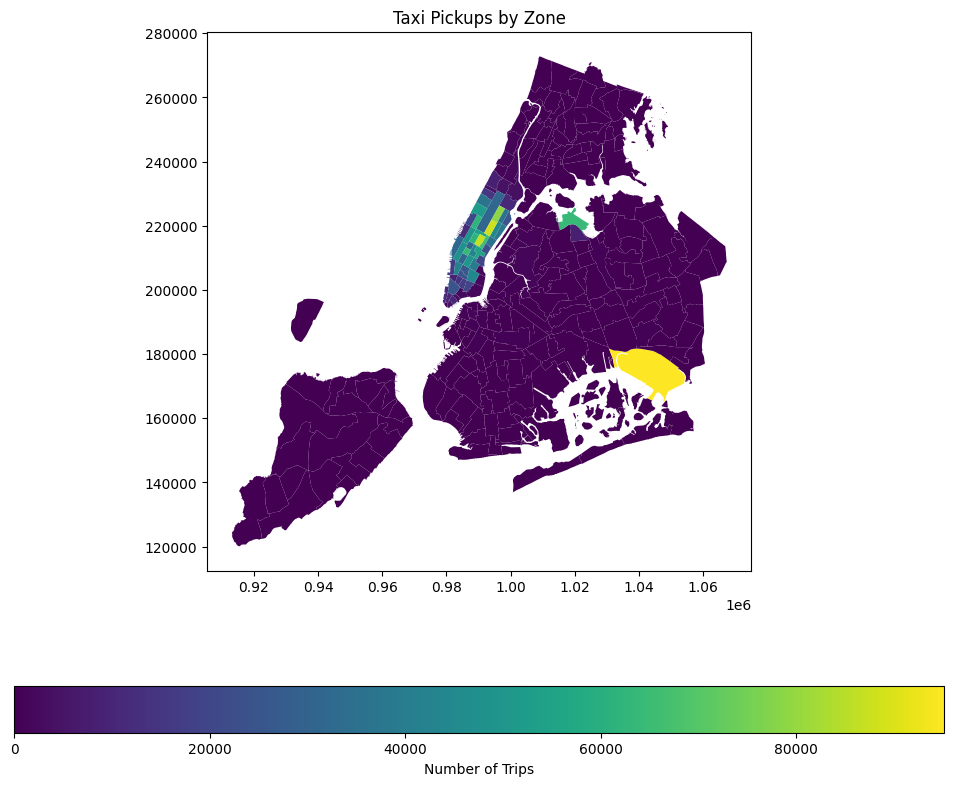

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones_with_trips.plot(column='trip_count',
                       ax=ax,
                       legend=True,
                       legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"})

plt.title('Taxi Pickups by Zone')
plt.show()

In [ ]:
# Display the zones DF sorted by the number of trips
display(zones_with_trips.sort_values(by='trip_count', ascending=False).head(10))



,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",95174.0
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",87917.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",86632.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",78948.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",66095.0
137,138,0.107467,0.000537,LaGuardia Airport,138,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",63953.0
185,186,0.024696,0.000037,Penn Station/Madison Sq West,186,Manhattan,"POLYGON ((986752.603 210853.699, 986627.863 21...",63665.0
141,142,0.038176,0.000076,Lincoln Square East,142,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21...",61877.0
229,230,0.031028,0.000056,Times Sq/Theatre District,230,Manhattan,"POLYGON ((988786.877 214532.094, 988650.277 21...",61757.0
169,170,0.045769,0.000074,Murray Hill,170,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",55146.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

# Calculate average trip distance and duration for each pickup-dropoff pair per hour
route_hourly_stats = merged_df.groupby(['PULocationID', 'DOLocationID', merged_df['tpep_pickup_datetime'].dt.hour]).agg(
    avg_trip_distance=('trip_distance', 'mean'),
    avg_trip_duration=('trip_duration', 'mean')
).reset_index()

# Calculate average speed (miles per minute)
# Add a small epsilon to avoid division by zero for duration
route_hourly_stats['avg_speed_mph'] = (route_hourly_stats['avg_trip_distance'] / (route_hourly_stats['avg_trip_duration'] + 1e-9)) * 60 # convert to miles per hour

# Identify potentially slow routes (e.g., where avg_speed_mph is low)
# Display routes with the lowest average speed
display(route_hourly_stats.sort_values(by='avg_speed_mph').head(10))

,PULocationID,DOLocationID,tpep_pickup_datetime,avg_trip_distance,avg_trip_duration,avg_speed_mph
133445,265,169,15,19.54,-0.050000,-23448.000469
133166,265,9,11,5.31,-0.016667,-19116.001147
133305,265,86,22,20.38,-0.100000,-12228.000122
133167,265,9,22,13.44,-0.066667,-12096.000181
133396,265,140,10,10.00,-0.050000,-12000.000240
133215,265,41,17,20.68,-0.116667,-10635.428663
133383,265,137,6,4.94,-0.033333,-8892.000267
133576,265,244,7,5.12,-0.050000,-6144.000123
133262,265,69,13,8.73,-0.100000,-5238.000052
133455,265,176,14,5.48,-0.066667,-4932.000074


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

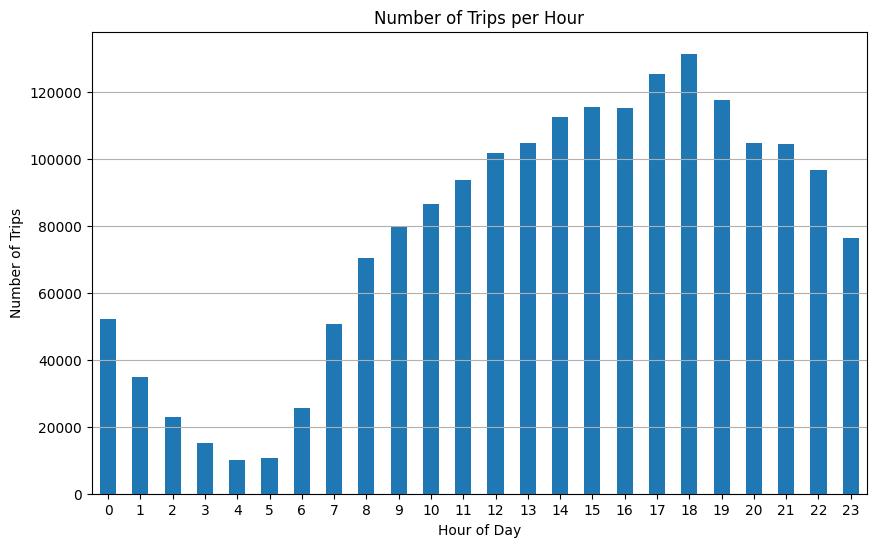

The busiest hour is hour 18 with 131428 trips.


In [ ]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trip_counts = df_nonzero_financials['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(10, 6))
hourly_trip_counts.plot(kind='bar')
plt.title('Number of Trips per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_count = hourly_trip_counts.max()

print(f"The busiest hour is hour {busiest_hour} with {busiest_hour_count} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# Get the top 5 busiest hours
top_5_busiest_hours = hourly_trip_counts.nlargest(5)

# Scale up the counts
actual_top_5_busiest_hours = top_5_busiest_hours / sample_fraction

print("Actual number of trips in the five busiest hours:")
display(actual_top_5_busiest_hours)

Actual number of trips in the five busiest hours:


,count
tpep_pickup_datetime,
18,2628560.0
17,2507220.0
19,2352300.0
15,2307360.0
16,2306240.0


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

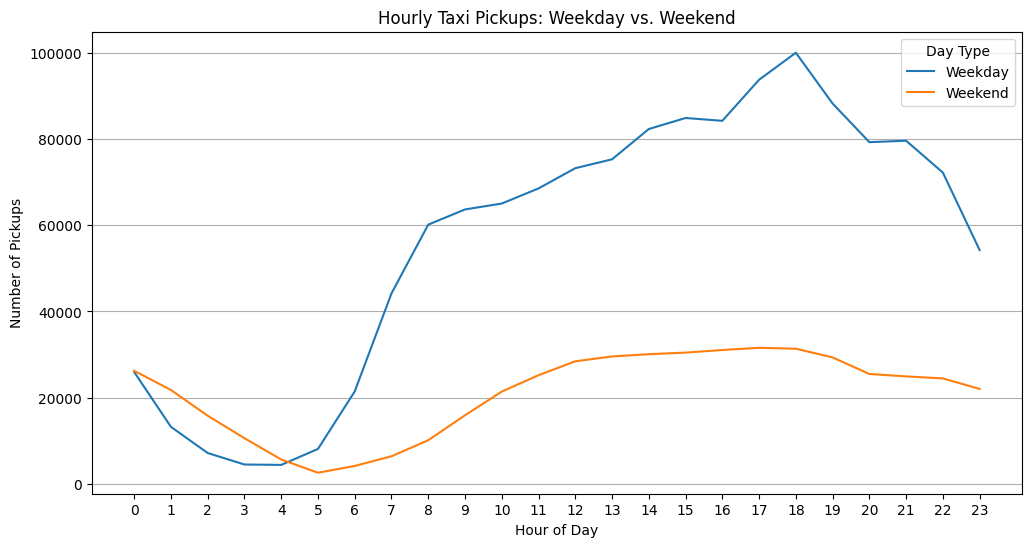

tpep_pickup_datetime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_type,,,,,,,,,,,,,,,,,,,,,
Weekday,25946,13218,7140,4476,4379,8090,21442,44190,60160,63685,...,82356,84915,84261,93791,100069,88279,79305,79639,72244,54259
Weekend,26228,21772,15797,10583,5632,2566,4140,6387,10109,15898,...,30082,30453,31051,31570,31359,29336,25491,24927,24459,22028


In [ ]:
# Compare traffic trends for the week days and weekends

# Categorize days as weekday (0-4) or weekend (5-6)
df_nonzero_financials['day_type'] = df_nonzero_financials['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Group by day type and hour and count trips
hourly_traffic_by_day_type = df_nonzero_financials.groupby(['day_type', df_nonzero_financials['tpep_pickup_datetime'].dt.hour]).size().unstack()

# Plot the hourly trends for weekdays and weekends
plt.figure(figsize=(12, 6))
hourly_traffic_by_day_type.T.plot(kind='line', ax=plt.gca())
plt.title('Hourly Taxi Pickups: Weekday vs. Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(axis='y')
plt.legend(title='Day Type')
plt.show()

display(hourly_traffic_by_day_type)

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

# Calculate hourly pickup counts for each zone
hourly_zone_pickups = df_nonzero_financials.groupby(['PULocationID', df_nonzero_financials['tpep_pickup_datetime'].dt.hour]).size().unstack(fill_value=0)

# Calculate hourly dropoff counts for each zone
hourly_zone_dropoffs = df_nonzero_financials.groupby(['DOLocationID', df_nonzero_financials['tpep_dropoff_datetime'].dt.hour]).size().unstack(fill_value=0)

# Find the overall top 10 pickup zones
top_10_pickup_zones = hourly_zone_pickups.sum(axis=1).nlargest(10).index

# Find the overall top 10 dropoff zones
top_10_dropoff_zones = hourly_zone_dropoffs.sum(axis=1).nlargest(10).index

print("Top 10 Pickup Zones:")
display(top_10_pickup_zones)
print("\nTop 10 Dropoff Zones:")
display(top_10_dropoff_zones)

# Visualize hourly trends for top 10 pickup zones
plt.figure(figsize=(14, 8))
hourly_zone_pickups.loc[top_10_pickup_zones].T.plot(kind='line', ax=plt.gca())
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(axis='y')
plt.legend(title='Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualize hourly trends for top 10 dropoff zones
plt.figure(figsize=(14, 8))
hourly_zone_dropoffs.loc[top_10_dropoff_zones].T.plot(kind='line', ax=plt.gca())
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Dropoffs')
plt.xticks(range(24))
plt.grid(axis='y')
plt.legend(title='Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Top 10 Pickup Zones:


Index([132, 237, 161, 236, 162, 138, 186, 142, 230, 170], dtype='int64', name='PULocationID')


Top 10 Dropoff Zones:


Index([236, 237, 161, 230, 170, 162, 142, 239, 141, 68], dtype='int64', name='DOLocationID')

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Calculate total pickup counts per zone
total_pickups_per_zone = df_nonzero_financials['PULocationID'].value_counts().sort_index()

# Calculate total dropoff counts per zone
total_dropoffs_per_zone = df_nonzero_financials['DOLocationID'].value_counts().sort_index()

# Combine pickup and dropoff counts into a single DataFrame
pickup_dropoff_counts = pd.DataFrame({
    'pickup_count': total_pickups_per_zone,
    'dropoff_count': total_dropoffs_per_zone
}).fillna(0) # Fill zones with no pickups or dropoffs with 0

# Calculate the pickup/dropoff ratio
# Add a small epsilon to the denominator to avoid division by zero
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / (pickup_dropoff_counts['dropoff_count'] + 1e-9)

# Display the top 10 highest ratios
print("Top 10 Pickup/Dropoff Ratios:")
display(pickup_dropoff_counts.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10))

# Display the bottom 10 lowest ratios
print("\nBottom 10 Pickup/Dropoff Ratios:")
display(pickup_dropoff_counts.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10))

Top 10 Pickup/Dropoff Ratios:


,pickup_count,dropoff_count,pickup_dropoff_ratio
199,2.0,0.0,2.000000e+09
70,8249.0,896.0,9.206473e+00
132,95174.0,21078.0,4.515324e+00
138,63953.0,24071.0,2.656848e+00
186,63665.0,40607.0,1.567833e+00
114,24699.0,17928.0,1.377677e+00
43,31076.0,22666.0,1.371040e+00
249,41269.0,30990.0,1.331688e+00
162,66095.0,53013.0,1.246770e+00
100,30393.0,25554.0,1.189364e+00



Bottom 10 Pickup/Dropoff Ratios:


,pickup_count,dropoff_count,pickup_dropoff_ratio
30,0.0,18.0,0.000000
221,0.0,35.0,0.000000
176,0.0,13.0,0.000000
99,0.0,3.0,0.000000
109,0.0,26.0,0.000000
1,49.0,5567.0,0.008802
27,1.0,38.0,0.026316
251,1.0,34.0,0.029412
245,1.0,31.0,0.032258
156,1.0,26.0,0.038462


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter data for night hours (23, 0, 1, 2, 3, 4, 5)
night_hours_df = df_nonzero_financials[df_nonzero_financials['tpep_pickup_datetime'].dt.hour.isin([23, 0, 1, 2, 3, 4, 5])]

# Find top 10 pickup zones during night hours
night_hourly_pickup_zones = night_hours_df['PULocationID'].value_counts().nlargest(10)

# Find top 10 dropoff zones during night hours
night_hourly_dropoff_zones = night_hours_df['DOLocationID'].value_counts().nlargest(10)

print("Top 10 Pickup Zones during Night Hours (11 PM - 5 AM):")
display(night_hourly_pickup_zones)

print("\nTop 10 Dropoff Zones during Night Hours (11 PM - 5 AM):")
display(night_hourly_dropoff_zones)

Top 10 Pickup Zones during Night Hours (11 PM - 5 AM):


,count
PULocationID,
79,16015
132,14367
249,12815
48,10620
148,9956
114,8977
230,8317
186,7012
164,6295



Top 10 Dropoff Zones during Night Hours (11 PM - 5 AM):


,count
DOLocationID,
79,8460
48,7025
170,6338
68,5937
107,5809
141,5431
263,5167
249,4991
230,4694


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
night_hours_df = df_nonzero_financials[df_nonzero_financials['tpep_pickup_datetime'].dt.hour.isin([23, 0, 1, 2, 3, 4, 5])]

# Filter for daytime hours (6 AM to 10 PM)
daytime_hours_df = df_nonzero_financials[~df_nonzero_financials['tpep_pickup_datetime'].dt.hour.isin([23, 0, 1, 2, 3, 4, 5])]

# Calculate total revenue for night and day
night_revenue = night_hours_df['total_amount'].sum()
daytime_revenue = daytime_hours_df['total_amount'].sum()
total_overall_revenue = df_nonzero_financials['total_amount'].sum()

# Calculate revenue share
night_revenue_share = night_revenue / total_overall_revenue
daytime_revenue_share = daytime_revenue / total_overall_revenue

print(f"Nighttime revenue share (11 PM - 5 AM): {night_revenue_share:.2%}")
print(f"Daytime revenue share (6 AM - 10 PM): {daytime_revenue_share:.2%}")

Nighttime revenue share (11 PM - 5 AM): 12.14%
Daytime revenue share (6 AM - 10 PM): 87.86%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

# Calculate fare per mile for each trip (add a small epsilon to avoid division by zero)
df_nonzero_financials['fare_per_mile'] = df_nonzero_financials['fare_amount'] / (df_nonzero_financials['trip_distance'] + 1e-9)

# Calculate fare per mile per passenger
df_nonzero_financials['fare_per_mile_per_passenger'] = df_nonzero_financials['fare_per_mile'] / df_nonzero_financials['passenger_count']

# Group by passenger count and find the average fare per mile per passenger
average_fare_per_mile_per_passenger = df_nonzero_financials.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
display(average_fare_per_mile_per_passenger)

,fare_per_mile_per_passenger
passenger_count,
0.0,inf
1.0,11.004018
2.0,6.431862
3.0,3.907812
4.0,4.362879
5.0,1.709614
6.0,1.350744


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day

# Calculate average fare per mile by hour of the day
average_fare_per_mile_hourly = df_nonzero_financials.groupby(df_nonzero_financials['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean()
print("Average fare per mile by hour of the day:")
display(average_fare_per_mile_hourly)

# Calculate average fare per mile by day of the week
average_fare_per_mile_daily = df_nonzero_financials.groupby(df_nonzero_financials['tpep_pickup_datetime'].dt.dayofweek)['fare_per_mile'].mean()
print("\nAverage fare per mile by day of the week:")
display(average_fare_per_mile_daily)

Average fare per mile by hour of the day:


,fare_per_mile
tpep_pickup_datetime,
0,10.466988
1,11.203604
2,9.872298
3,10.799943
4,13.226921
5,13.894556
6,10.984831
7,10.152639
8,10.306650



Average fare per mile by day of the week:


,fare_per_mile
tpep_pickup_datetime,
0,10.926214
1,12.078213
2,11.040120
3,11.233138
4,10.903678
5,10.870066
6,12.504771


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Average fare per mile by vendor and hour of the day:


tpep_pickup_datetime,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
VendorID,,,,,,,,,,,,,,,,,,,,,
1,6.794411,7.051904,6.925365,6.504467,7.492353,6.963880,6.647252,7.192896,8.073105,8.395736,...,8.651844,8.815116,8.830112,8.652919,8.453599,7.920592,7.459216,7.312158,7.007083,6.896116
2,11.518725,12.393619,10.741421,12.025127,14.932138,16.535499,12.804257,11.358250,11.189396,11.281725,...,12.642173,13.872002,15.671246,13.150978,12.604113,12.764448,10.243334,10.153562,11.047388,11.846564
6,4.363383,5.728431,NaN,NaN,55.510204,3.889734,3.892467,4.238542,5.220734,6.822444,...,5.695402,6.249789,6.312212,4.918189,5.398586,5.736274,3.890220,4.424056,6.358829,4.080673


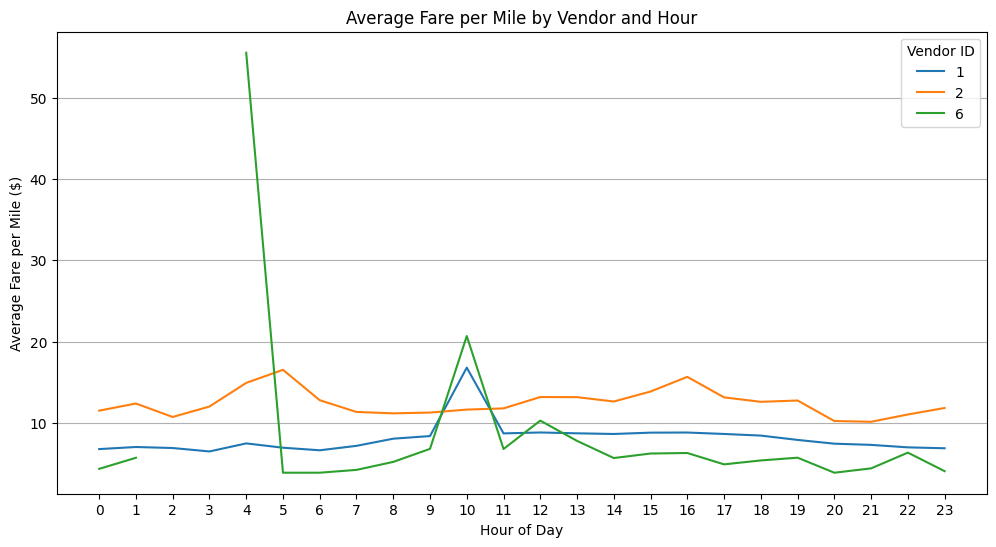

In [ ]:
# Compare fare per mile for different vendors
average_fare_per_mile_vendor_hourly = df_nonzero_financials.groupby(['VendorID', df_nonzero_financials['tpep_pickup_datetime'].dt.hour])['fare_per_mile'].mean().unstack()

print("Average fare per mile by vendor and hour of the day:")
display(average_fare_per_mile_vendor_hourly)

# Optionally, visualize this
plt.figure(figsize=(12, 6))
average_fare_per_mile_vendor_hourly.T.plot(kind='line', ax=plt.gca())
plt.title('Average Fare per Mile by Vendor and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(24))
plt.grid(axis='y')
plt.legend(title='Vendor ID')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Average fare per mile by vendor and distance tier:


distance_tier,0-2 miles,2-5 miles,>5 miles
VendorID,,,
1,10.780870,6.457661,4.440163
2,18.050774,6.546372,4.490953
6,32.422471,8.107119,4.382026


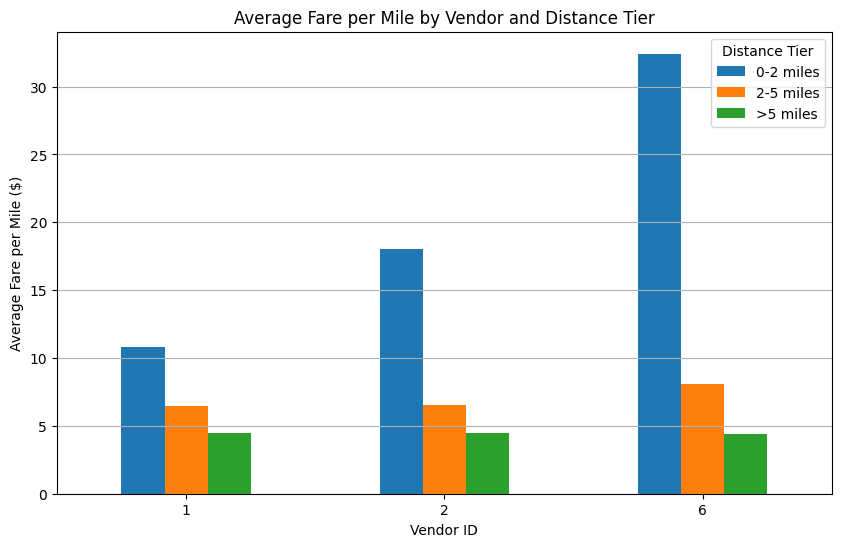

In [ ]:
# Defining distance tiers
distance_bins = [0, 2, 5, df_nonzero_financials['trip_distance'].max()]
distance_labels = ['0-2 miles', '2-5 miles', '>5 miles']
df_nonzero_financials['distance_tier'] = pd.cut(df_nonzero_financials['trip_distance'], bins=distance_bins, labels=distance_labels, right=False)

# Calculate average fare per mile for different vendors within each distance tier
average_fare_per_mile_vendor_distance = df_nonzero_financials.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().unstack()

print("Average fare per mile by vendor and distance tier:")
display(average_fare_per_mile_vendor_distance)

# Optionally, visualize this
plt.figure(figsize=(10, 6))
average_fare_per_mile_vendor_distance.plot(kind='bar', ax=plt.gca())
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Vendor ID')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title='Distance Tier')
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Calculate tip percentage (add a small epsilon to avoid division by zero)
df_nonzero_financials['tip_percentage'] = (df_nonzero_financials['tip_amount'] / (df_nonzero_financials['total_amount'] + 1e-9)) * 100

# Analyze average tip percentage by trip distance (using the distance tiers created earlier)
average_tip_percentage_distance = df_nonzero_financials.groupby('distance_tier')['tip_percentage'].mean()
print("Average tip percentage by distance tier:")
display(average_tip_percentage_distance)

# Analyze average tip percentage by passenger count
average_tip_percentage_passenger = df_nonzero_financials.groupby('passenger_count')['tip_percentage'].mean()
print("\nAverage tip percentage by passenger count:")
display(average_tip_percentage_passenger)

# Analyze average tip percentage by hour of pickup
average_tip_percentage_hourly = df_nonzero_financials.groupby(df_nonzero_financials['tpep_pickup_datetime'].dt.hour)['tip_percentage'].mean()
print("\nAverage tip percentage by hour of pickup:")
display(average_tip_percentage_hourly)

Average tip percentage by distance tier:


,tip_percentage
distance_tier,
0-2 miles,12.127897
2-5 miles,12.223795
>5 miles,11.283188



Average tip percentage by passenger count:


,tip_percentage
passenger_count,
0.0,11.536312
1.0,12.125662
2.0,11.787278
3.0,11.356973
4.0,10.492258
5.0,12.133528
6.0,12.211439



Average tip percentage by hour of pickup:


,tip_percentage
tpep_pickup_datetime,
0,11.916784
1,11.870263
2,11.683652
3,11.229745
4,10.465208
5,10.314447
6,11.075243
7,11.913337
8,12.227852


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

Analysis of trips with low tip percentage (< 10%):


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,airport_fee_combined,pickup_hour,pickup_day_of_week,pickup_month,quarter,trip_duration,fare_per_mile,fare_per_mile_per_passenger,tip_percentage
count,622567.000000,622567,622567,622567.000000,622567.000000,622567.000000,622567.000000,622567.000000,622567.000000,622567.000000,...,622567.000000,602805.000000,622567.000000,622567.000000,622567.000000,622567.000000,622567.000000,622567.000000,6.225560e+05,622567.000000
mean,1.730925,2023-07-01 22:18:48.499551,2023-07-01 22:37:50.299502,1.381641,4.215257,2.536461,162.838199,160.722244,1.546947,20.819472,...,2.147641,0.158926,14.025432,3.026346,6.510480,2.502463,19.029999,15.247765,inf,2.497334
min,1.000000,2023-01-01 00:00:57,2023-01-01 00:09:35,0.000000,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-53.216667,0.000000,0.000000e+00,0.000000
25%,1.000000,2023-04-03 00:21:27,2023-04-03 00:49:16,1.000000,1.060000,1.000000,132.000000,107.000000,1.000000,9.300000,...,2.500000,0.000000,10.000000,1.000000,4.000000,2.000000,7.766667,5.518519,4.227273e+00,0.000000
50%,2.000000,2023-06-27 05:33:59,2023-06-27 05:47:13,1.000000,1.850000,1.000000,161.000000,162.000000,2.000000,14.200000,...,2.500000,0.000000,15.000000,3.000000,6.000000,2.000000,13.100000,7.153846,6.368421e+00,0.000000
75%,2.000000,2023-10-03 21:48:18.500000,2023-10-03 22:05:19.500000,1.000000,3.720000,1.000000,231.000000,233.000000,2.000000,23.300000,...,2.500000,0.000000,18.000000,5.000000,10.000000,4.000000,21.483333,9.259259,8.666667e+00,6.097561
max,6.000000,2023-12-31 23:57:51,2024-01-01 20:50:55,6.000000,56823.800000,99.000000,265.000000,265.000000,4.000000,143163.450000,...,2.500000,1.750000,23.000000,6.000000,12.000000,4.000000,5522.433333,204519.213994,inf,10.000000
std,0.459279,NaN,NaN,0.903367,113.644733,11.886942,64.491983,70.984803,0.671712,182.482100,...,0.869908,0.487124,5.805673,1.943012,3.447933,1.119816,54.524827,320.594567,NaN,3.661762



Analysis of trips with high tip percentage (> 25%):


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,airport_fee_combined,pickup_hour,pickup_day_of_week,pickup_month,quarter,trip_duration,fare_per_mile,fare_per_mile_per_passenger,tip_percentage
count,9162.000000,9162,9162,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000,...,9162.000000,8909.000000,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000,9162.000000,9160.000000,9162.000000
mean,1.647020,2023-07-04 21:51:27.977734,2023-07-04 22:04:55.541585,1.348177,2.362864,1.033726,162.681838,163.461144,0.973259,14.328124,...,2.166558,0.086009,13.576075,3.109801,6.599214,2.532198,13.459398,10.226432,inf,34.482471
min,1.000000,2023-01-01 00:05:12,2023-01-01 00:16:24,0.000000,0.010000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,25.026399
25%,1.000000,2023-04-02 16:57:37.250000,2023-04-02 17:26:50.250000,1.000000,0.700000,1.000000,114.000000,113.000000,1.000000,6.500000,...,2.500000,0.000000,10.000000,1.000000,4.000000,2.000000,5.033333,6.211180,4.726221,27.322404
50%,2.000000,2023-07-01 20:09:15.500000,2023-07-01 20:12:40.500000,1.000000,1.190000,1.000000,162.000000,162.000000,1.000000,9.300000,...,2.500000,0.000000,14.000000,3.000000,7.000000,3.000000,8.350000,8.000000,7.200000,30.534351
75%,2.000000,2023-10-10 04:36:54,2023-10-10 04:47:38.250000,1.000000,2.310000,1.000000,231.000000,234.000000,1.000000,16.300000,...,2.500000,0.000000,18.000000,5.000000,10.000000,4.000000,15.412500,10.333333,9.875000,37.313433
max,2.000000,2023-12-31 23:37:10,2023-12-31 23:44:44,6.000000,49.000000,5.000000,265.000000,265.000000,4.000000,250.800000,...,2.500000,1.750000,23.000000,6.000000,12.000000,4.000000,1437.350000,1999.999933,inf,99.236641
std,0.477923,NaN,NaN,0.873591,3.515494,0.268122,66.366472,70.305220,0.171182,14.444281,...,0.850001,0.366747,5.898419,1.958402,3.505455,1.134498,41.931451,28.230141,NaN,10.796447


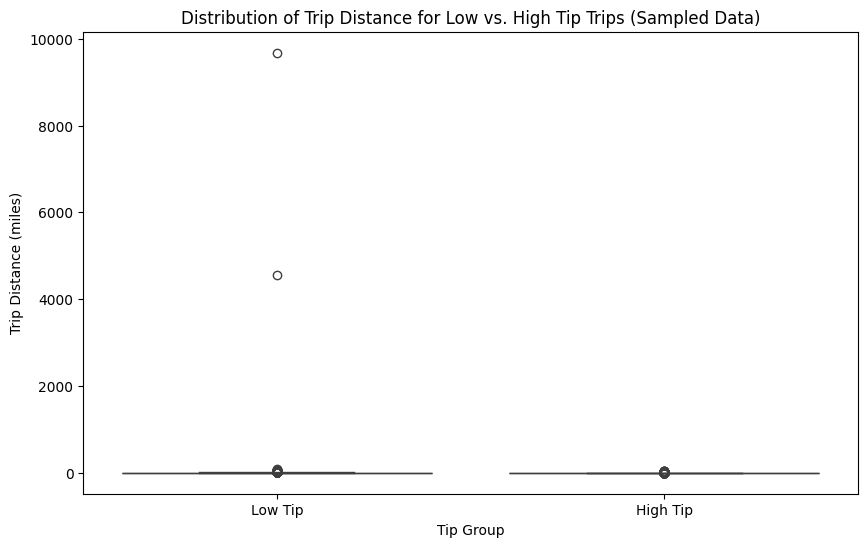


Average values for low vs. high tip trips:


,Low Tip (<10%),High Tip (>25%)
passenger_count,1.381641,1.348177
trip_distance,4.215257,2.362864
fare_amount,20.819472,14.328124
total_amount,26.884569,30.683127
trip_duration,19.029999,13.459398


In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Filter for trips with low tip percentage (< 10%)
low_tip_df = df_nonzero_financials[df_nonzero_financials['tip_percentage'] < 10].copy()

# Filter for trips with high tip percentage (> 25%)
high_tip_df = df_nonzero_financials[df_nonzero_financials['tip_percentage'] > 25].copy()

print("Analysis of trips with low tip percentage (< 10%):")
display(low_tip_df.describe())

print("\nAnalysis of trips with high tip percentage (> 25%):")
display(high_tip_df.describe())

# You can also compare distributions of specific columns between the two groups
# For example, comparing trip distance distributions:
plt.figure(figsize=(10, 6))
# Sample the data before plotting to avoid memory issues
low_tip_sample = low_tip_df.sample(frac=0.1, random_state=42) if len(low_tip_df) > 10000 else low_tip_df
high_tip_sample = high_tip_df.sample(frac=0.1, random_state=42) if len(high_tip_df) > 10000 else high_tip_df

# Use a box plot for better comparison of distributions
sns.boxplot(data=pd.concat([low_tip_sample.assign(tip_group='Low Tip'), high_tip_sample.assign(tip_group='High Tip')]),
            x='tip_group',
            y='trip_distance')

plt.title('Distribution of Trip Distance for Low vs. High Tip Trips (Sampled Data)')
plt.xlabel('Tip Group')
plt.ylabel('Trip Distance (miles)')
plt.show()

# Compare average values of relevant columns
comparison_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'total_amount', 'trip_duration']

print("\nAverage values for low vs. high tip trips:")
comparison_summary = pd.DataFrame({
    'Low Tip (<10%)': low_tip_df[comparison_cols].mean(),
    'High Tip (>25%)': high_tip_df[comparison_cols].mean()
})
display(comparison_summary)



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

Average passenger count by hour of the day:


,passenger_count
tpep_pickup_datetime,
0,1.403764
1,1.407173
2,1.421415
3,1.422339
4,1.359604
5,1.258446
6,1.225236
7,1.248571
8,1.264526



Average passenger count by day of the week:


,passenger_count
tpep_pickup_datetime,
0,1.337428
1,1.310540
2,1.306495
3,1.319446
4,1.373700
5,1.450913
6,1.434984


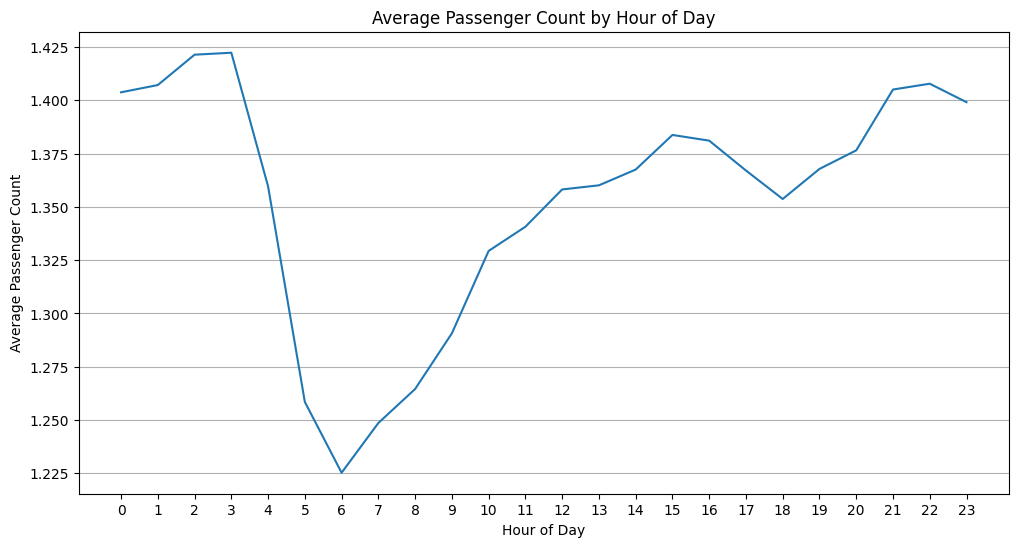

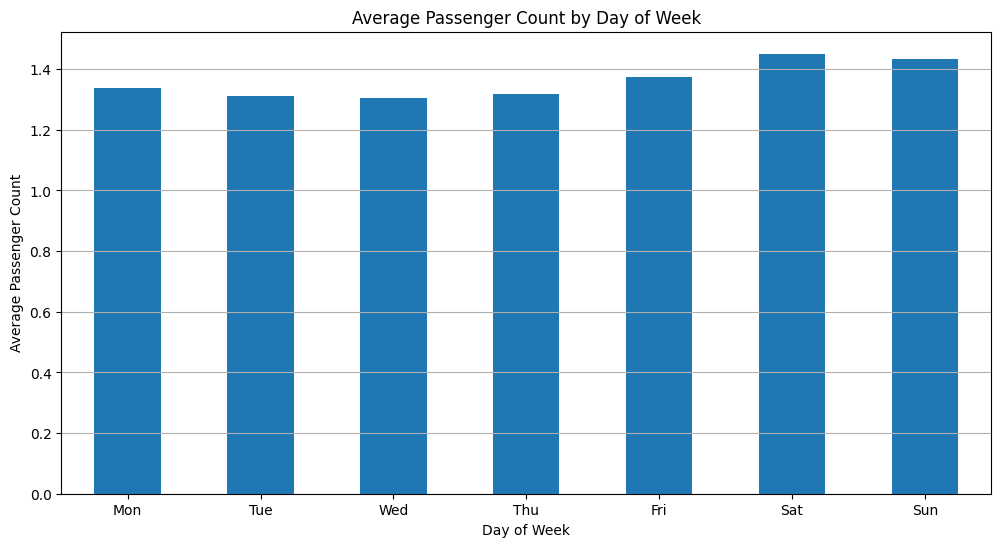

In [ ]:
# See how passenger count varies across hours and days

# Group by hour and find the average passenger count
average_passenger_count_hourly = df_nonzero_financials.groupby(df_nonzero_financials['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean()
print("Average passenger count by hour of the day:")
display(average_passenger_count_hourly)

# Group by day of the week and find the average passenger count
average_passenger_count_daily = df_nonzero_financials.groupby(df_nonzero_financials['tpep_pickup_datetime'].dt.dayofweek)['passenger_count'].mean()
print("\nAverage passenger count by day of the week:")
display(average_passenger_count_daily)

# Optionally, visualize these
plt.figure(figsize=(12, 6))
average_passenger_count_hourly.plot(kind='line')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(12, 6))
average_passenger_count_daily.plot(kind='bar')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.grid(axis='y')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
average_passenger_count_by_zone = df_nonzero_financials.groupby('PULocationID')['passenger_count'].mean()
print("Average passenger count by zone:")
display(average_passenger_count_by_zone.head())

Average passenger count by zone:


,passenger_count
PULocationID,
1,1.306122
2,1.000000
3,1.000000
4,1.341342
5,1.000000


In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



In [ ]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(location_trip_counts, on='LocationID', how='left')
# Fill NaN trip counts with 0 for zones with no pickups in the sampled data
zones_with_trips['trip_count'] = zones_with_trips['trip_count'].fillna(0)
print("Zones DataFrame with trip counts:")
display(zones_with_trips.head())

Zones DataFrame with trip counts:


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",49.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",32.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2206.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",9.0


In [ ]:
# Calculate the average passenger count for each zone
average_passenger_count_by_zone = df_nonzero_financials.groupby('PULocationID')['passenger_count'].mean().reset_index()
average_passenger_count_by_zone.columns = ['PULocationID', 'average_passenger_count']

# Merge average passenger count to the zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(average_passenger_count_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

# Drop the redundant PULocationID column if it exists and is not the original PULocationID
if 'PULocationID_y' in zones_with_trips.columns:
    zones_with_trips = zones_with_trips.drop(columns=['PULocationID_y'])
elif 'PULocationID_x' in zones_with_trips.columns and 'PULocationID' in zones_with_trips.columns:
    # This case might occur if the original column is also named PULocationID and one is renamed
    # We need to make sure we keep the one that corresponds to LocationID in zones
     zones_with_trips = zones_with_trips.drop(columns=['PULocationID_x'])


zones_with_trips['average_passenger_count'] = zones_with_trips['average_passenger_count'].fillna(0)

print("\nZones DataFrame with average passenger count per zone:")
display(zones_with_trips.head())


Zones DataFrame with average passenger count per zone:


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,trip_count,PULocationID,average_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",49.0,1.0,1.306122
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0,1.000000
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",32.0,3.0,1.000000
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",2206.0,4.0,1.341342
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",9.0,5.0,1.000000


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# Analyze the pickup/dropoff zones or times when extra charges are applied more frequently

surcharge_cols = ['extra', 'mta_tax', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee_combined']

# Analyze average surcharge amounts by pickup hour
print("Average Surcharge Amounts by Pickup Hour:")
for col in surcharge_cols:
    avg_surcharge_hourly = df_nonzero_financials.groupby(df_nonzero_financials['tpep_pickup_datetime'].dt.hour)[col].mean()
    print(f"\nAverage '{col}' by Hour:")
    display(avg_surcharge_hourly)

# Analyze average surcharge amounts by top 10 pickup zones
# Using the 'top_10_pickup_zones' identified earlier
print("\nAverage Surcharge Amounts by Top 10 Pickup Zones:")
for col in surcharge_cols:
    avg_surcharge_zone = df_nonzero_financials[df_nonzero_financials['PULocationID'].isin(top_10_pickup_zones)].groupby('PULocationID')[col].mean()
    print(f"\nAverage '{col}' by Top 10 Pickup Zone:")
    display(avg_surcharge_zone)

Average Surcharge Amounts by Pickup Hour:

Average 'extra' by Hour:


,extra
tpep_pickup_datetime,
0,1.636383
1,1.523275
2,1.525073
3,1.528382
4,1.603706
5,1.694698
6,0.902813
7,0.875947
8,0.889144



Average 'mta_tax' by Hour:


,mta_tax
tpep_pickup_datetime,
0,0.497572
1,0.497136
2,0.496656
3,0.493193
4,0.486365
5,0.482920
6,0.492450
7,0.495876
8,0.496834



Average 'tolls_amount' by Hour:


,tolls_amount
tpep_pickup_datetime,
0,0.452074
1,0.294563
2,0.224449
3,0.403765
4,1.194081
5,1.743929
6,1.113937
7,0.707299
8,0.577997



Average 'improvement_surcharge' by Hour:


,improvement_surcharge
tpep_pickup_datetime,
0,0.999772
1,0.999611
2,0.999786
3,0.999655
4,0.999271
5,0.998592
6,0.998214
7,0.999464
8,0.999515



Average 'congestion_surcharge' by Hour:


,congestion_surcharge
tpep_pickup_datetime,
0,2.204594
1,2.250071
2,2.291603
3,2.251312
4,2.031515
5,1.862096
6,2.004828
7,2.166202
8,2.223420



Average 'airport_fee_combined' by Hour:


,airport_fee_combined
tpep_pickup_datetime,
0,0.173490
1,0.098993
2,0.052768
3,0.045341
4,0.059660
5,0.185675
6,0.197927
7,0.125814
8,0.105468



Average Surcharge Amounts by Top 10 Pickup Zones:

Average 'extra' by Top 10 Pickup Zone:


,extra
PULocationID,
132,1.527039
138,6.291512
142,1.455980
161,1.630396
162,1.581455
170,1.463941
186,1.368031
230,1.607206
236,1.386734



Average 'mta_tax' by Top 10 Pickup Zone:


,mta_tax
PULocationID,
132,0.491821
138,0.495655
142,0.498537
161,0.496516
162,0.497160
170,0.497140
186,0.497231
230,0.492289
236,0.499343



Average 'tolls_amount' by Top 10 Pickup Zone:


,tolls_amount
PULocationID,
132,3.454189
138,4.459631
142,0.144497
161,0.377675
162,0.337579
170,0.376661
186,0.257933
230,0.733463
236,0.121998



Average 'improvement_surcharge' by Top 10 Pickup Zone:


,improvement_surcharge
PULocationID,
132,0.999579
138,0.999842
142,0.999152
161,0.999674
162,0.999725
170,0.999804
186,0.999479
230,0.999700
236,0.999726



Average 'congestion_surcharge' by Top 10 Pickup Zone:


,congestion_surcharge
PULocationID,
132,1.246034
138,1.603639
142,2.435194
161,2.447104
162,2.452266
170,2.434628
186,2.460339
230,2.421062
236,2.431411



Average 'airport_fee_combined' by Top 10 Pickup Zone:


,airport_fee_combined
PULocationID,
132,1.518642
138,1.607377
142,0.000083
161,0.000275
162,0.000291
170,0.000754
186,0.000258
230,0.000692
236,0.000065


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Based on the analysis of the 2023 New York City taxi trip data, here are some recommendations to optimize routing and dispatching:

# 1. Leverage Hourly and Daily Demand Patterns:

# Peak Hours: The analysis showed clear peak hours for taxi pickups, particularly in the late afternoon and early evening (around 4 PM to 7 PM on weekdays). Dispatching more taxis to high-demand zones during these times can reduce wait times and increase efficiency.
# Weekday vs. Weekend: The hourly traffic patterns differ significantly between weekdays and weekends. Weekdays show a strong morning and evening commute peak, while weekends have a more spread-out demand throughout the day, with a later peak. Routing and dispatching strategies should be adjusted accordingly.
# 2. Focus on Busiest Zones:

# The analysis identified the top 10 busiest pickup and dropoff zones (e.g., JFK Airport, Upper East Side South, Midtown Center). These zones should be prioritized for taxi allocation, especially during peak hours.
# Analyzing the pickup/dropoff ratios in different zones can help identify areas with high pickup demand and low dropoff supply, or vice versa. This information can inform repositioning strategies to ensure taxis are available where they are needed most.
# 3. Address Operational Inefficiencies (Slow Routes):

# While the analysis of slow routes requires further investigation into the negative trip durations observed, identifying routes with consistently low average speeds can help optimize routing by suggesting alternative paths or highlighting areas where traffic congestion is a major issue.
# 4. Utilize Geographical Insights:

# The choropleth map showing trip counts by zone visually highlights areas with high taxi activity. This can guide dispatchers in strategically positioning taxis to cover high-demand areas and ensure quick response times.
# Recommendations for Routing and Dispatching:

# Dynamic Dispatching: Implement a dynamic dispatching system that uses real-time data on demand patterns, traffic conditions, and taxi locations to efficiently route taxis to the nearest passenger in high-demand areas.
# Zone-Based Allocation: Allocate a higher number of taxis to the busiest pickup zones during their respective peak hours.
# Repositioning Strategies: Develop strategies to reposition taxis from zones with low pickup demand to nearby high-demand zones, especially during transitions between peak and off-peak hours or between different days of the week.
# Traffic-Aware Routing: Integrate real-time traffic data into the routing system to avoid congested areas and minimize trip duration, especially on routes identified as potentially slow.
# Driver Incentives: Consider incentivizing drivers to operate in high-demand zones or during peak hours to ensure adequate supply.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# Based on the analysis of trip trends across time, days, and months, here are some suggestions for strategically positioning cabs across different zones:

# 1. Align Cab Positioning with Peak Demand Hours:

# Weekday Evenings (4 PM - 7 PM): Concentrate a higher number of cabs in major business districts and areas with high office density, as these are the peak hours for the evening commute.
# Weekend Evenings and Nights: Position more cabs in entertainment areas, restaurant districts, and areas with nightlife, as demand is higher during these times on weekends.
# Morning Commute (Weekdays): Ensure sufficient cab availability in residential areas and transportation hubs during the morning rush hours.
# 2. Prioritize High-Activity Zones:

# Busiest Pickup Zones: Maintain a consistent supply of cabs in the top pickup zones identified (e.g., airports, major transit hubs, central business districts).
# High Pickup/Low Dropoff Ratio Zones: Strategically reposition cabs to zones with a high pickup-to-dropoff ratio. These are areas where more people are starting their trips than ending them, indicating a consistent need for available taxis.
# 3. Consider Time-Based Zone Shifts:

# As the day progresses, shift cab positioning from morning commute areas to midday activity centers (e.g., shopping districts, tourist attractions) and then to evening peak zones.
# During late nights and early mornings, focus on areas with ongoing activity, such as airports, major hotels, and entertainment venues that close late.
# 4. Utilize Real-time Data:

# Implement a system that uses real-time data on current demand and cab locations to dynamically adjust positioning. This allows for quick responses to unexpected surges in demand or changes in traffic patterns.
# 5. Optimize Positioning Based on Day of the Week:

# Adjust positioning strategies based on the day of the week. Weekends may require more focus on recreational and entertainment areas, while weekdays prioritize business and commute routes.
# By strategically positioning cabs based on these data-driven insights, the taxi operation can improve efficiency, reduce passenger wait times, and potentially increase revenue by being available where and when demand is highest.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# Based on the data analysis, here are some data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates:

# 1. Dynamic Pricing Based on Time of Day and Day of Week:

# Peak Hour Surcharges: The analysis clearly shows peak demand during certain hours (especially weekday evenings) and on certain days (like Thursdays and Fridays). Implement dynamic pricing with moderate surcharges during these high-demand periods to capitalize on willingness to pay while managing demand.
# Nighttime Pricing: The analysis of average fare per mile by hour showed some fluctuations during night hours. Consider slightly adjusting rates during specific nighttime hours based on demand patterns to optimize revenue without deterring customers.
# Weekend vs. Weekday Rates: While the average fare per mile doesn't show drastic differences between weekdays and weekends overall, the hourly patterns do. Tailor dynamic pricing to reflect these hourly differences on weekends.
# 2. Tiered Pricing Based on Trip Distance:

# The analysis of average fare per mile by distance tier showed higher rates per mile for shorter trips. Maintain competitive base fares for short distances but ensure the per-mile rate decreases for longer trips to remain attractive for those journeys.
# Review the pricing structure for trips over 5 miles to ensure it's competitive with other vendors, as the average fare per mile tends to decrease for these longer distances.
# 3. Competitive Analysis Based on Vendor Rates:

# The analysis comparing average fare per mile across vendors and by hour/distance tier can inform pricing adjustments. If one vendor consistently has significantly lower or higher rates in specific segments (e.g., short trips, certain hours), adjust pricing to be competitive while still aiming for revenue maximization. Avoid price wars, but ensure rates are within a reasonable range of competitors.
# 4. Consider Passenger Count in Pricing (with Caution):

# The analysis of average fare per mile per passenger showed that the per-passenger cost decreases with more passengers. While you cannot directly charge per passenger in a standard taxi fare structure, this insight can inform strategies like promoting ride-sharing options or slightly adjusting base fares in areas with higher average passenger counts during certain times. However, be mindful of regulations and customer expectations.
# 5. Analyze Surcharges and Extra Fees:

# Review the application of surcharges (congestion, airport fees, etc.) based on the analysis of when and where they are most frequently applied. Ensure these are clearly communicated to customers to avoid disputes.
# Consider the impact of these surcharges on the total fare and overall competitiveness, especially in zones where multiple surcharges might apply.
# 6. Data-Driven Promotions and Discounts:

# Use the demand patterns to strategically offer promotions or discounts during off-peak hours or in lower-demand zones to stimulate business.
# 7. Transparency in Pricing:

# Clearly display fare structures, potential surcharges, and dynamic pricing information to customers to build trust and manage expectations.
# By implementing these data-driven pricing adjustments, the taxi operation can strategically optimize revenue streams while remaining competitive in the market. Continuous monitoring and analysis of these metrics are crucial for ongoing optimization.